# **MINOR PROJECT** (Capstone 1)

# Importing Libraries

In [2]:
# Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr, spearmanr

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploring Data

> **When reading the data, the compiler shows an error.
Therefore, let's open the file and read the the top 20 lines of data to see what the error is about.**

In [3]:
with open('/content/drive/MyDrive/Colab Notebooks/nhanes_adult_male_bmx_2020.csv') as f:
    for _ in range(20):
        print(f.readline())

# Body measurements of males >= 18 years old [cm]

#

# Weight (kg)

# Standing Height (cm)

# Upper Arm Length (cm)

# Upper Leg Length (cm)

# Arm Circumference (cm)

# Hip Circumference (cm)

# Waist Circumference (cm)

#

# The US Centers for Disease Control and Prevention

# National Health and Nutrition Examination Survey

# Based on 2017-March 2020 Data on Body Measures (P_BMX) and

# Demographic Variables and Sample Weights (P_DEMO)

# Published: May 2021

# Description: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.htm

# and https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.htm

# License: public domain as per https://www.cdc.gov/other/agencymaterials.html

"BMXWT","BMXHT","BMXARML","BMXLEG","BMXARMC","BMXHIP","BMXWAIST"

98.8,182.3,42,40.1,38.2,108.2,120.4



> **The data apparently has comments in the first 18 lines. Therefore, the file needs to be read while ignoring the comments.**

In [4]:
# Reading the two files as numpy matrices
male_data =  np.loadtxt('/content/drive/MyDrive/Colab Notebooks/nhanes_adult_male_bmx_2020.csv', delimiter=',', skiprows=19)
female_data =  np.loadtxt('/content/drive/MyDrive/Colab Notebooks/nhanes_adult_female_bmx_2020.csv', delimiter=',', skiprows=19)

# Printing the shape of the data
print("male matrix shape:", male_data.shape)
print("female matrix shape:", female_data.shape)

male matrix shape: (4081, 7)
female matrix shape: (4221, 7)


In [ ]:
print("\nFirst 5 rows of male matrix:\n", male_data[:5])


First 5 rows of male matrix:
 [[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]


In [ ]:
print("\nFirst 5 rows of female matrix:\n", female_data[:5])


First 5 rows of female matrix:
 [[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]


**There are 7 columns in the data. And they are:**

*   BMXWT = Weight
*   BMXHT = Height
*   BMXARML = Upper Arm Length
*   BMXLEG = Upper Leg Length
*   BMXARMC = Arm Circumference
*   BMXHIP = Hip Circumference
*   BMXWAIST = Waist Circumference

***

# Data Visualization

> **Lets first find the correlation matrix between the columns and we'll visualize it into a Heatmap. In this way, we will be able to see the relationship between the attributes more clearly and visualize them.**

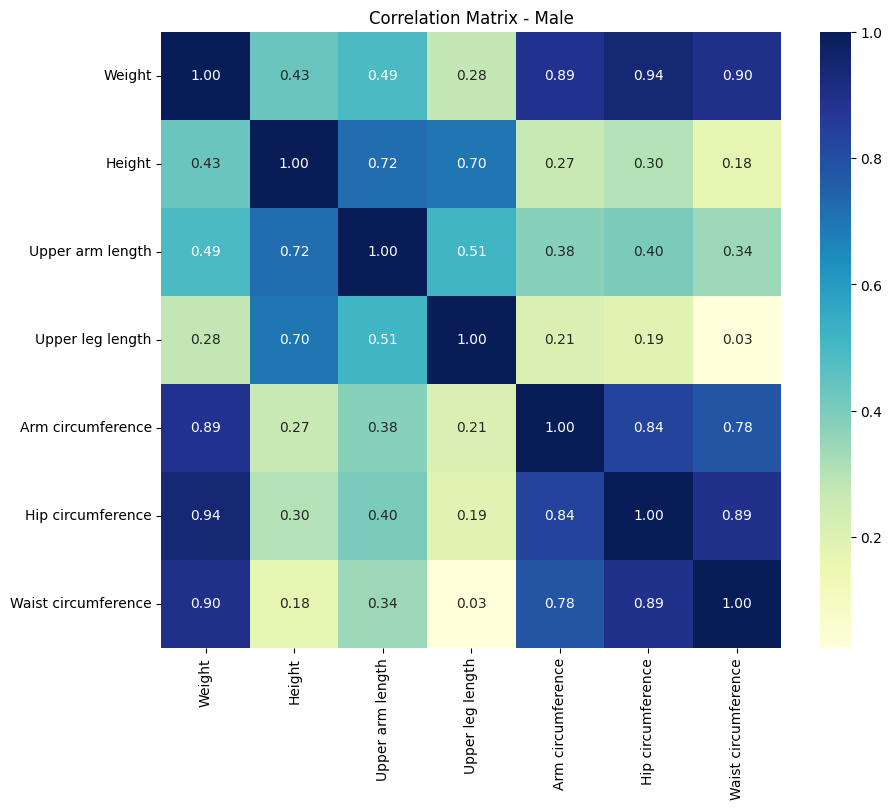

In [6]:
# Column names as per instructions
column_names = [
    'Weight',
    'Height',
    'Upper arm length',
    'Upper leg length',
    'Arm circumference',
    'Hip circumference',
    'Waist circumference'
]

# Computing the correlation matrix for male data
corr_male = np.corrcoef(male_data.T)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_male, xticklabels=column_names, yticklabels=column_names, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Correlation Matrix - Male")
plt.show()

**Observations:**

> **This correlation heatmap shows that weight is strongly correlated with body circumferences like arm, waist, and hip, indicating that heavier individuals tend to have larger body sizes. Height is highly related to limb lengths, but not significantly linked to waist or hip measurements.**

***

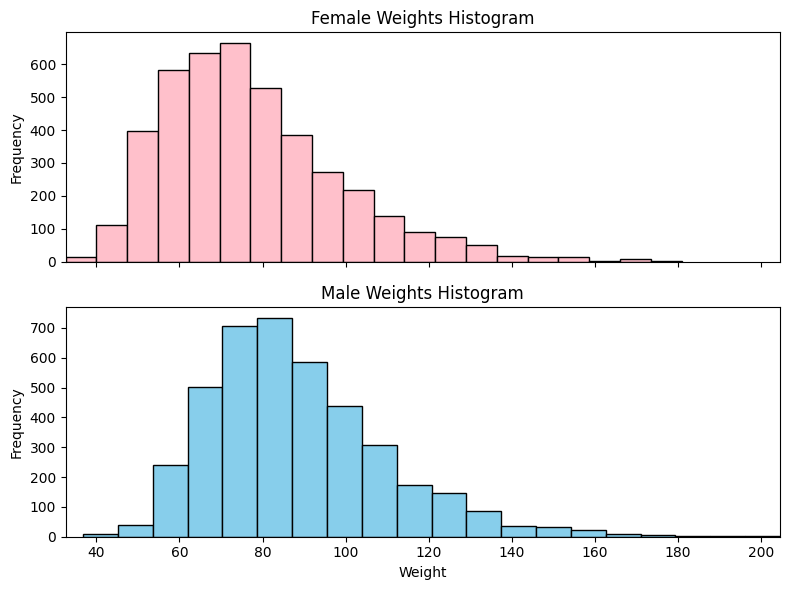

In [7]:
# Histogram for female and male weights (Q3)

male_weights = male_data[:, 0]      #Since the weights are in first column. Hence index 0
female_weights = female_data[:, 0]

# Calculate shared x-axis limits
min_weight = min(male_weights.min(), female_weights.min())
max_weight = max(male_weights.max(), female_weights.max())

# Plotting 2 subplots: Female on top, Male on bottom
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)


# Female weights histogram
axis1.hist(female_weights, bins=20, color='pink', edgecolor='black')
axis1.set_title('Female Weights Histogram')
axis1.set_ylabel('Frequency')
axis1.set_xlim(min_weight, max_weight)

# Male weights histogram
axis2.hist(male_weights, bins=20, color='skyblue', edgecolor='black')
axis2.set_title('Male Weights Histogram')
axis2.set_xlabel('Weight')
axis2.set_ylabel('Frequency')
axis2.set_xlim(min_weight, max_weight)

plt.tight_layout()
plt.show()

**Observations:**

> **The histograms show the distribution of weights for males and females. Female weights are right-skewed, with most values between 50–100 kg and a peak around 60–70 kg. A few outliers exceed 140 kg. Male weights are more symmetrically distributed in comparison, peaking around 75–85 kg, and spread more widely, ranging from 35-180 kg.**

***



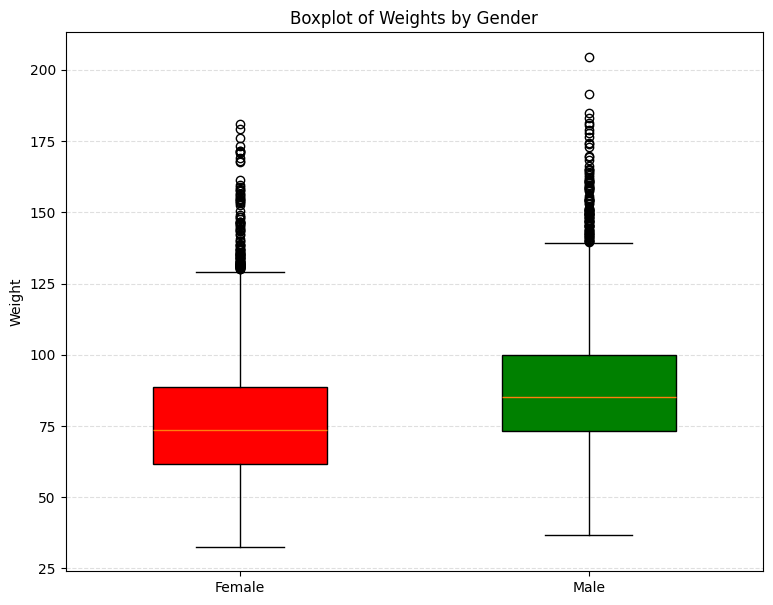

In [22]:
# Create a box-and-whisker plot (Q4)

plt.figure(figsize=(9, 7))
boxp = plt.boxplot([female_weights, male_weights],
                   tick_labels=['Female', 'Male'],
                   patch_artist=True,     # Fill with color
                   widths=0.5)

colors = ['red', 'green'] #color for each box
for patch, color in zip(boxp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Boxplot of Weights by Gender')
plt.ylabel('Weight')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

##**Observations:**

*   Median weight is higher for males than females, showing that males tend to weigh more on average.

*   IQR is wider for males, meaning there's more variation in male weights than in female weights.

*   Both distributions have many outliers, but males show a greater number of high-weight outliers — some even above 200 kg.

*   Whiskers extend to similar ranges relative to the IQR, but the male group has a broader overall spread.

> **The plot shows that males generally have higher and more varied body weights than females. While both genders have some extreme values, outliers in the male group reach higher weights.**

***

# Statistics

**Measures of Location: (Central Tendancy)**

*   Mean
*   Median

**Measures of Dispersion: (Spread)**

*   Standard Deviation
*   Variance
*   Range
*   IQR

**Measures of Shape: (Shape)**

*   Skewness
*   Kurtosis

In [9]:
# Computing basic numerical aggregates of weights (Q5)

def describe_weights(weights, name):
    stats_dict = {
        "Count": len(weights),
        "Mean (kg)": np.mean(weights),
        "Median (kg)": np.median(weights),
        "Std Deviation (kg)": np.std(weights),
        "Variance (kg^2)": np.var(weights),
        "Min (kg)": np.min(weights),
        "Max (kg)": np.max(weights),
        "Range (kg)": np.ptp(weights),     # (max - min)
        "IQR (kg)": np.quantile(weights, 0.75) - np.quantile(weights, 0.25),
        "Skewness": skew(weights),
        "Kurtosis": kurtosis(weights)
    }

    print(f"\n=== {name} Weights ===")
    for key, value in stats_dict.items():
        if isinstance(value, (float, np.floating)):
          print(f"{key}: {value:.3f}")
        else:
          print(f"{key}: {value}")
    return stats_dict

# Generate and print statistics
female_stats = describe_weights(female_weights, "Female")
male_stats = describe_weights(male_weights, "Male")


=== Female Weights ===
Count: 4221
Mean (kg): 77.404
Median (kg): 73.600
Std Deviation (kg): 21.543
Variance (kg^2): 464.080
Min (kg): 32.600
Max (kg): 180.900
Range (kg): 148.300
IQR (kg): 27.100
Skewness: 1.033
Kurtosis: 1.401

=== Male Weights ===
Count: 4081
Mean (kg): 88.365
Median (kg): 85.000
Std Deviation (kg): 21.419
Variance (kg^2): 458.771
Min (kg): 36.800
Max (kg): 204.600
Range (kg): 167.800
IQR (kg): 26.500
Skewness: 0.984
Kurtosis: 1.474


##**Observations:**

* Males display a broader overall range (167.8 kg).
* Males show higher central tendency with a mean weight of 88.4 kg compared to females' 77.4 kg.
* While both show similar dispersion with nearly identical std deviations (approx. 21.5 kg) and IQR (approx. 27 kg).
* Both groups show right-skewed distributions (skewness > 0).
* Kurtosis values > 1 indicate distributions are more peaked with heavier tails than a normal distribution.
* Males show slightly less skewness but higher kurtosis than females.

***

# BMI of all female participants.


In [10]:
#Q6

female_heights = female_data[:, 1]   # in cm

# Convert height from cm to m and calculate BMI
female_heights_m = female_heights / 100
bmi = female_weights / (female_heights_m ** 2)

# Reshaping BMI to be a column vector and add it as the 8th column
bmi_column = bmi.reshape(-1, 1)
female_with_bmi = np.hstack((female_data, bmi_column))

# Verifying the new shape
print("Original female data shape:", female_data.shape)
print("Female data with BMI shape:", female_with_bmi.shape)

Original female data shape: (4221, 7)
Female data with BMI shape: (4221, 8)


In [11]:
print("First 10 BMI values:\n", female_with_bmi[:10, 7].round(1))

First 10 BMI values:
 [37.8 39.1 28.1 24.9 23.2 29.6 23.9 31.8 30.5 30.1]


***

# Z-scores of female data.

In [12]:
# Calculate z-scores for each column in the female matrix (Q7)
zfemale = (female_with_bmi- np.mean(female_with_bmi, axis=0)) / np.std(female_with_bmi, axis=0)

# Verify standardization worked
print("Column means after standardization:", np.mean(zfemale, axis=0).round(2))
print("Column stds after standardization:", np.std(zfemale, axis=0).round(2))

Column means after standardization: [ 0.  0. -0. -0.  0. -0.  0. -0.]
Column stds after standardization: [1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
print("\nFirst 5 rows of z_score female matrix:\n", zfemale[:5].round(2))


First 5 rows of z_score female matrix:
 [[ 0.91  0.01 -0.57  1.13  0.55  1.08  1.12  1.  ]
 [ 0.64 -1.05 -1.08 -1.29  1.03  1.04  0.27  1.16]
 [-0.2   0.15  0.58  0.26 -0.16 -0.19 -0.37 -0.26]
 [-0.73 -0.39  0.84 -0.76 -0.66 -0.52 -0.46 -0.67]
 [-1.02 -0.78 -0.61 -0.98 -0.79 -1.07 -1.45 -0.89]]


# Pair Plot

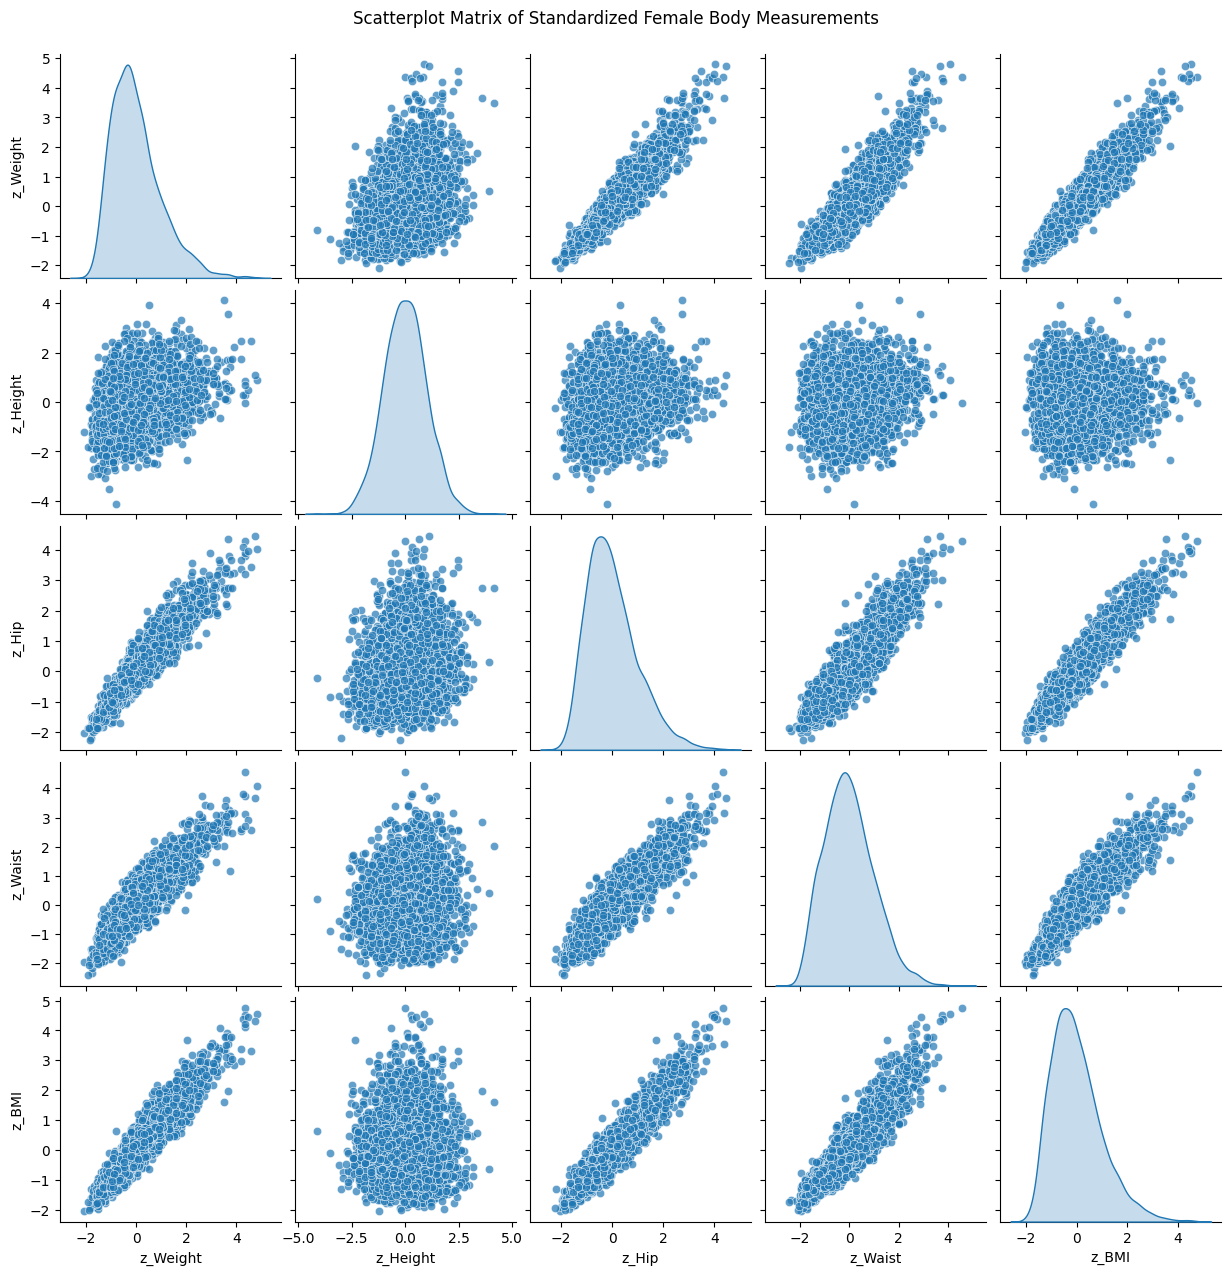

In [14]:
columns = [0, 1, 5, 6, 7]  # Column indices for weight, height, hip, waist, BMI
zfemale_subset = zfemale[:, columns]

# Create a Pandas DataFrame for pairplot
df_zfemale = pd.DataFrame(zfemale_subset,
                          columns=['z_Weight', 'z_Height', 'z_Hip', 'z_Waist', 'z_BMI'])

# Create Pairplot
sns.pairplot(df_zfemale, diag_kind='kde',plot_kws={'alpha': 0.7})
plt.suptitle('Scatterplot Matrix of Standardized Female Body Measurements', y=1.02)
plt.show()

## **Observations:**

* The scatterplot shows strong linear correlations between weight and circumferences (hip/waist).

* Height shows weaker relationships with weight/BMI.

* All variables are approximately normally distributed due to standardization.

***


# Pearson & Spearman Corr

In [15]:
# Initializing dictionaries to store results
pearson_results = {}
spearman_results = {}

# Computing correlations for all pairs
variables = ['z_Weight', 'z_Height', 'z_Hip', 'z_Waist', 'z_BMI']
for i, x in enumerate(variables):
    for y in variables[i+1:]:
        pearson_r, _ = pearsonr(df_zfemale[x], df_zfemale[y])
        spearman_r, _ = spearmanr(df_zfemale[x], df_zfemale[y])
        pearson_results[f"{x} vs {y}"] = round(pearson_r, 3)
        spearman_results[f"{x} vs {y}"] = round(spearman_r, 3)

# Convert to DataFrames for neat display
df_pearson = pd.DataFrame(list(pearson_results.items()), columns=['Variables', 'Pearson r'])
df_spearman = pd.DataFrame(list(spearman_results.items()), columns=['Variables', 'Spearman ρ'])

print("Pearson Correlations:")
print(df_pearson.to_string(index=False))
print("\nSpearman Correlations:")
print(df_spearman.to_string(index=False))

Pearson Correlations:
           Variables  Pearson r
z_Weight vs z_Height      0.345
   z_Weight vs z_Hip      0.947
 z_Weight vs z_Waist      0.905
   z_Weight vs z_BMI      0.946
   z_Height vs z_Hip      0.203
 z_Height vs z_Waist      0.127
   z_Height vs z_BMI      0.033
    z_Hip vs z_Waist      0.897
      z_Hip vs z_BMI      0.944
    z_Waist vs z_BMI      0.921

Spearman Correlations:
           Variables  Spearman ρ
z_Weight vs z_Height       0.339
   z_Weight vs z_Hip       0.947
 z_Weight vs z_Waist       0.900
   z_Weight vs z_BMI       0.938
   z_Height vs z_Hip       0.205
 z_Height vs z_Waist       0.109
   z_Height vs z_BMI       0.020
    z_Hip vs z_Waist       0.888
      z_Hip vs z_BMI       0.934
    z_Waist vs z_BMI       0.923


## **Observations:**

* Weight has very high correlation with Hip (0.947), Waist (0.905), and BMI (0.946).

* Waist is highly correlated with BMI (0.921) and Hip (0.897).

* Height has low correlation with most variables, especially Waist (0.127) and Hip (0.203).

* Pearson and Spearman values are very similar, indicating consistent linear and monotonic relationships.

***

# Waist to Hip/Height Ratios

In [17]:
# Calculate ratios and add new columns
def add_ratios(matrix):
    height = matrix[:, 1]        # Column 1: height
    waist = matrix[:, 6]         # Column 6: waist circumference
    hip = matrix[:, 5]           # Column 5: hip circumference

    # Compute ratios
    waist_to_height = waist / height
    waist_to_hip = waist / hip

    # Reshape to column vectors and add to original matrix
    ratios = np.column_stack((waist_to_height, waist_to_hip))
    return np.hstack((matrix, ratios))

# Update matrices with new ratios
male_with_ratios = add_ratios(male_data)
female_with_ratios = add_ratios(female_with_bmi)

# Verify shapes
print("Male matrix shape:", male_with_ratios.shape)
print("Female matrix shape:", female_with_ratios.shape)

Male matrix shape: (4081, 9)
Female matrix shape: (4221, 10)


In [18]:
print("\nFirst 5 rows of male matrix with ratios:\n", male_with_ratios[:5].round(2))


First 5 rows of male matrix with ratio:
 [[ 98.8  182.3   42.    40.1   38.2  108.2  120.4    0.66   1.11]
 [ 74.3  184.2   41.1   41.    30.2   94.5   86.8    0.47   0.92]
 [103.7  185.3   47.    44.    32.   107.8  109.6    0.59   1.02]
 [ 86.   167.8   39.5   38.4   29.   106.4  108.3    0.65   1.02]
 [ 99.4  181.6   40.4   39.9   36.   120.2  107.     0.59   0.89]]


In [19]:
print("\nFirst 5 rows of female matrix with ratios:\n", female_with_ratios[:5].round(2))


First 5 rows of female matrix with ratios:
 [[ 97.1  160.2   34.7   40.8   35.8  126.1  117.9   37.84   0.74   0.93]
 [ 91.1  152.7   33.5   33.    38.5  125.5  103.1   39.07   0.68   0.82]
 [ 73.   161.2   37.4   38.    31.8  106.2   92.    28.09   0.57   0.87]
 [ 61.7  157.4   38.    34.7   29.   101.    90.5   24.9    0.57   0.9 ]
 [ 55.4  154.6   34.6   34.    28.3   92.5   73.2   23.18   0.47   0.79]]


>  The Male matrix has 1 less column than female matrix, because of the additional BMI column previously.

***

**Box-and-Whisker plot**

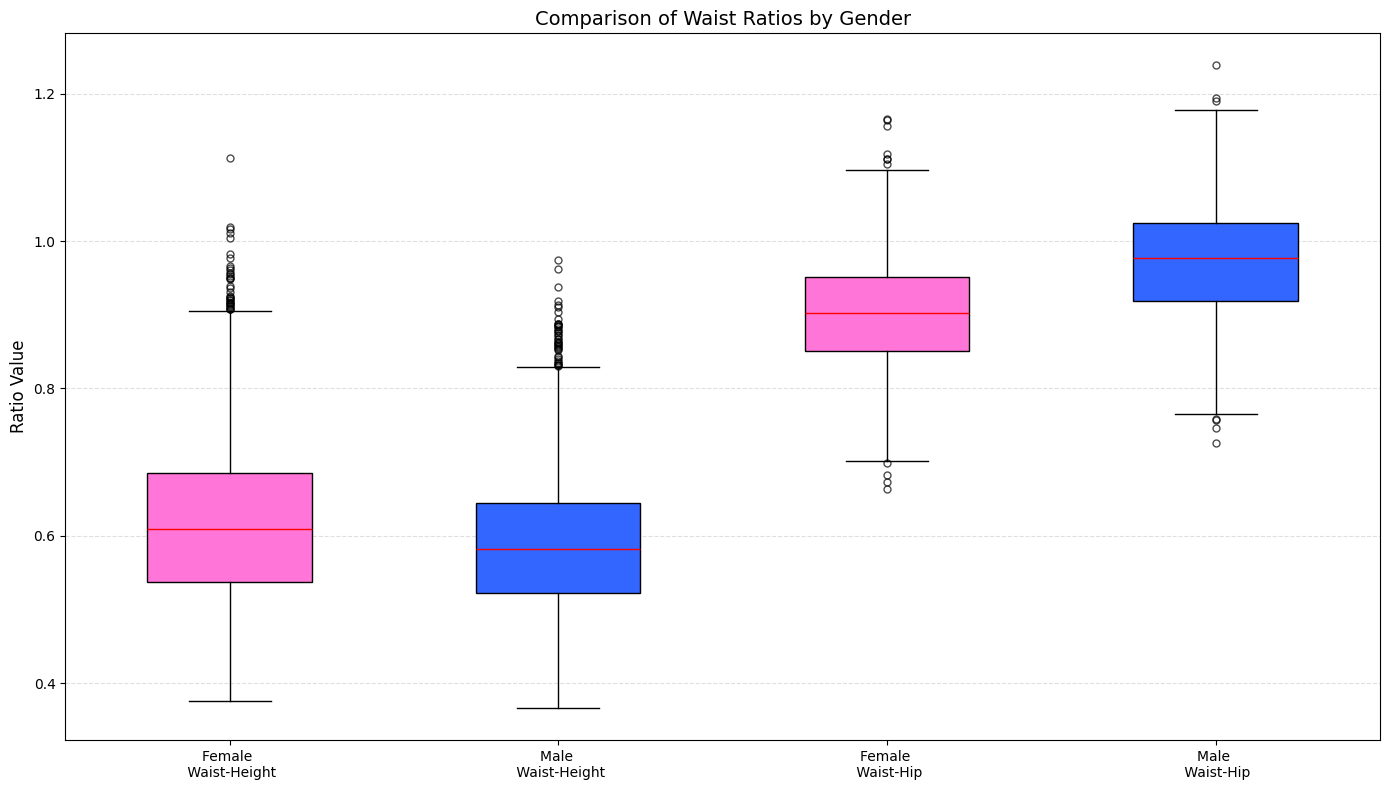

In [38]:
# Prepare data for boxplot
data_to_plot = [
    female_with_ratios[:, 8],  # Female waist-to-height
    male_with_ratios[:, 7],    # Male waist-to-height
    female_with_ratios[:, 9],  # Female waist-to-hip
    male_with_ratios[:, 8]     # Male waist-to-hip
]

# Customize plot
plt.figure(figsize=(14, 8))
ratios_box = plt.boxplot(data_to_plot,
                        patch_artist=True,
                        tick_labels=[ 'Female \n Waist-Height',
                                      'Male \n Waist-Height',
                                      'Female \n Waist-Hip',
                                      'Male \n Waist-Hip'],
                         widths=0.5)

# Color boxes by gender
female_color = '#FF76D8'
male_color = '#3366FF'

r_colors = [female_color, male_color, female_color, male_color]
for patch, color in zip(ratios_box['boxes'], r_colors):
    patch.set_facecolor(color)

# Add titles and labels
plt.title('Comparison of Waist Ratios by Gender', fontsize=14)
plt.ylabel('Ratio Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Customize whiskers and outliers
plt.setp(ratios_box['medians'], color='red')
plt.setp(ratios_box['fliers'], markersize=5, alpha=0.7)

plt.tight_layout()
plt.show()

###**Observaions:**

* The median waist-height ratio is slightly higher for females than for males.

* The IQR of waist-height ratios is similar for both genders, but females show more outliers on the higher end.

* The lowest waist-height ratio observed is slightly lower in males than in females.

* Males have a wider range of waist-hip ratios, with several high outliers reaching above 1.2.

* Female waist-hip ratios are more tightly clustered, with less extreme values than males.

***

# Advantages/Disadvantages

> ## **1. BMI**

### **Advantages:**

* It's easy to calculate using just height and weight.

* It's widely used and standardized across the world.

* Useful for identifying general weight categories (underweight, normal, overweight, obese).

### **Disadvantages:**

* It doesn’t account for muscle mass vs fat.

* It doesn’t show where fat is stored on the body.

* Less accurate in older adults or very fit individuals.


> ## **2. Waist-to-Height Ratio**

### **Advantages:**

* Reflects central fat, which is more linked to health risks.

* Works across age groups and body types.

* Simple to measure with a tape and height.

### **Disadvantages:**

* Still doesn’t fully distinguish between fat and muscle.

* Can vary with posture or how the waist is measured.


> ## **Waist-to-Hip Ratio**

### **Advantages:**

* It indicates fat distribution (eg. apple , pear shape)

* More predictive of certain health risks like heart disease.

### **Disadvantages:**

* Requires very precise measurement of both waist and hip.

* Can be less effective in populations where body shapes vary a lot.

***


# Highest and Lowest BMI

In [34]:
# Get BMI column
bmi_z = zfemale[:, 7]

# Get indices for sorted BMI
lowest_bmi_indices = np.argsort(bmi_z)[:5]           # 5 lowest BMI
highest_bmi_indices = np.argsort(bmi_z)[-5:][::-1]   # 5 highest BMI

# Combine and print results
print("=== Standardized Measurements ===")
print("\n--- 5 Lowest BMI Individuals ---")
print(zfemale[lowest_bmi_indices].round(2))

print("\n--- 5 Highest BMI Individuals ---")
print(zfemale[highest_bmi_indices].round(2))

=== Standardized Measurements ===

--- 5 Lowest BMI Individuals ---
[[-2.08 -1.22 -1.55 -1.17 -2.19 -2.04 -1.94 -2.05]
 [-1.88 -0.19 -1.72  0.39 -2.44 -1.85 -2.06 -1.99]
 [-1.54  1.81  0.63  0.57 -2.27 -1.68 -1.71 -1.97]
 [-1.84 -0.26 -0.23  0.51 -2.3  -2.25 -1.86 -1.94]
 [-1.61  0.89 -0.1   0.48 -2.21 -1.83 -1.71 -1.89]]

--- 5 Highest BMI Individuals ---
[[ 4.36 -0.03 -0.06 -0.17  2.78  4.32  4.57  4.76]
 [ 4.8   0.89  2.12  1.82  3.78  4.02  4.08  4.54]
 [ 4.35  0.28  2.84  1.94  4.37  3.92  3.75  4.51]
 [ 4.46  0.5   1.69 -1.14  3.35  3.98  2.9   4.46]
 [ 4.25  0.29  1.86 -0.98  2.37  4.1   3.82  4.4 ]]


# References


> * **Numpy.org**

> * **Deepseek/ChatGPT**

> * **Corizo recorded classes/notes**

> * **YouTube**

> * **Google**
